# Milestone 1: Data Collection and Preprocessing

## Objective
The goal of this notebook is to ingest fitness data, clean and preprocess it, normalize timestamps to UTC, handle missing values, and align all metrics to a 1-minute interval for further anomaly detection.


In [1]:
import pandas as pd
import numpy as np

# Create time series data
timestamps = pd.date_range(start="2025-01-01", periods=300, freq="T")

data = pd.DataFrame({
    "timestamp": timestamps,
    "heart_rate": np.random.randint(60, 100, size=300),
    "steps": np.random.randint(0, 20, size=300),
    "sleep": np.random.choice([0, 1], size=300)
})

data.head()


/tmp/ipython-input-1726706543.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2025-01-01", periods=300, freq="T")


,timestamp,heart_rate,steps,sleep
0,2025-01-01 00:00:00,98,2,1
1,2025-01-01 00:01:00,73,4,1
2,2025-01-01 00:02:00,82,16,1
3,2025-01-01 00:03:00,87,12,1
4,2025-01-01 00:04:00,80,12,0


In [2]:
data.to_csv("fitness_data.csv", index=False)


In [3]:
# Read data
df = pd.read_csv("fitness_data.csv")

# Convert timestamp to datetime in UTC
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)

# Set timestamp as index
df.set_index("timestamp", inplace=True)

# Handle missing values (if any)
df = df.fillna(method="ffill")

# Resample to 1-minute intervals
df_resampled = df.resample("1T").mean()

df_resampled.head()


/tmp/ipython-input-1445078507.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")
/tmp/ipython-input-1445078507.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample("1T").mean()


,heart_rate,steps,sleep
timestamp,,,
2025-01-01 00:00:00+00:00,98.0,2.0,1.0
2025-01-01 00:01:00+00:00,73.0,4.0,1.0
2025-01-01 00:02:00+00:00,82.0,16.0,1.0
2025-01-01 00:03:00+00:00,87.0,12.0,1.0
2025-01-01 00:04:00+00:00,80.0,12.0,0.0


## Observations
- Timestamps were successfully converted to UTC
- Missing values were handled using forward fill
- Data was aligned to a 1-minute interval
- Final dataset is clean and ready for anomaly detection


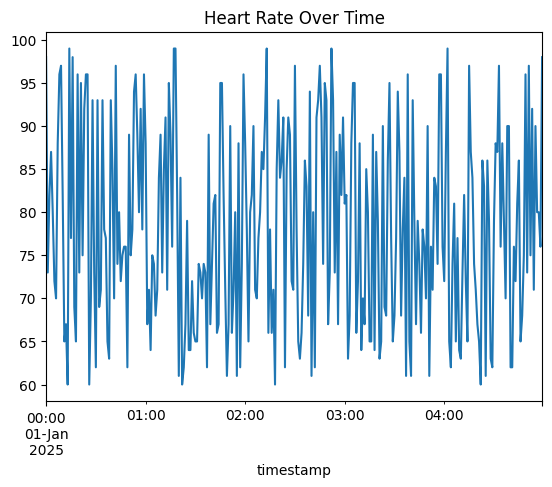

In [4]:
import matplotlib.pyplot as plt

df_resampled["heart_rate"].plot(title="Heart Rate Over Time")
plt.show()
